In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_excel("glass.xlsx")

In [65]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [66]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [67]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [68]:
print("Shape of dataset:", df.shape)
print("\nData types:")
print(df.dtypes)

Shape of dataset: (214, 10)

Data types:
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [69]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [70]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


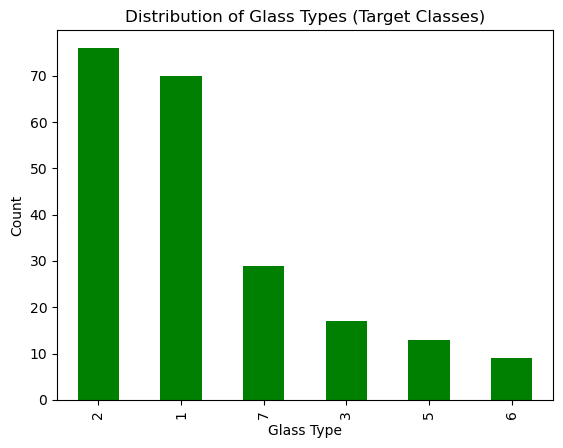

In [71]:
df["Type"].value_counts().plot(kind="bar", color="green")
plt.title("Distribution of Glass Types (Target Classes)")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

In [72]:
print(df.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


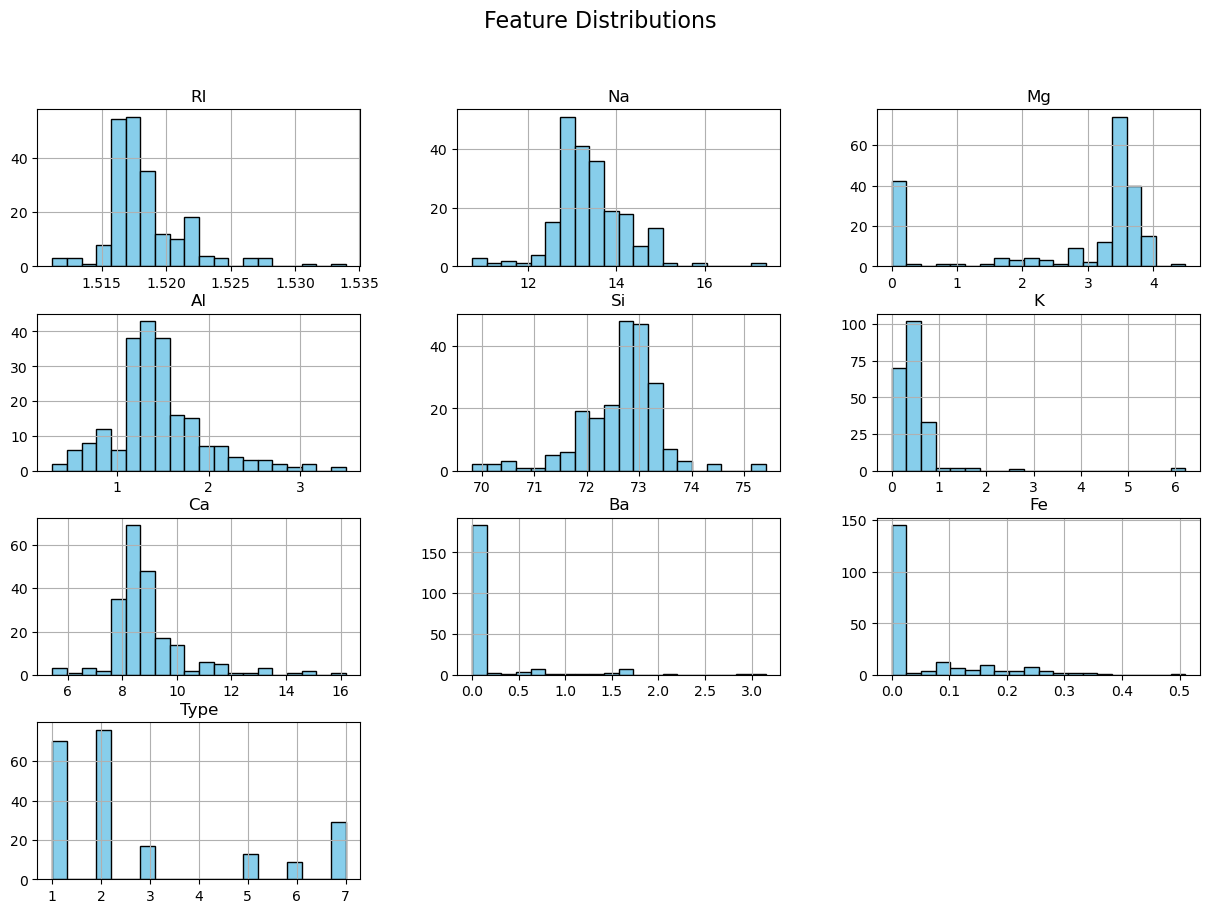

In [73]:
df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

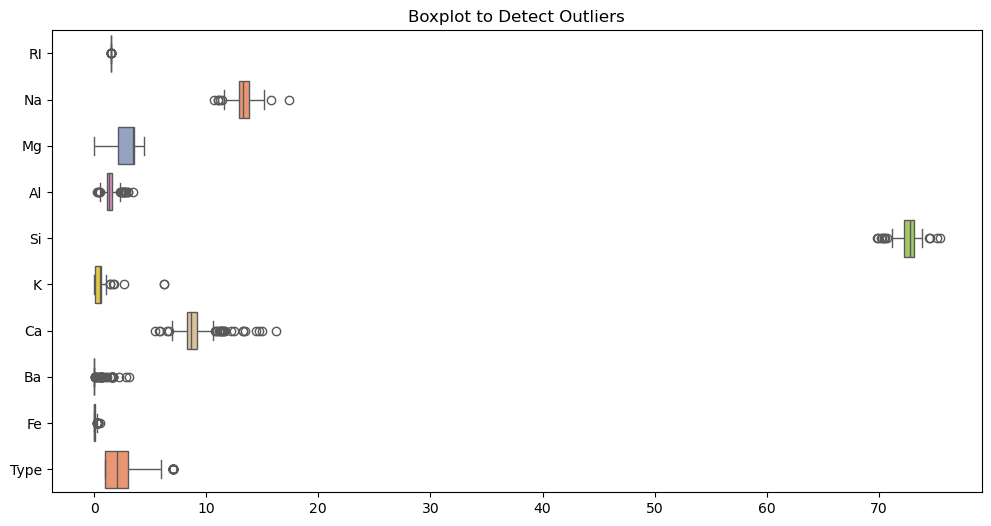

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot to Detect Outliers")
plt.show()

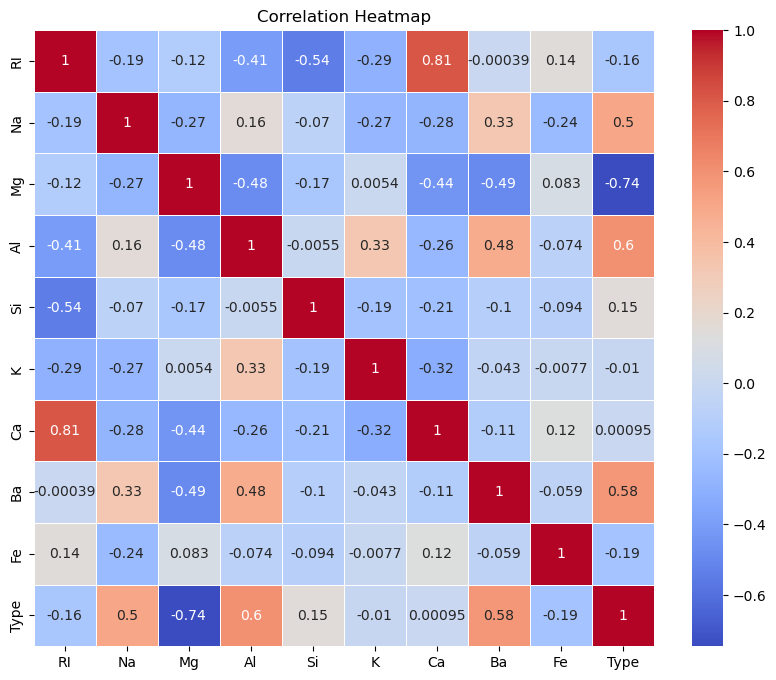

In [75]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [76]:
# Check and handle missing values if any
print(df.isnull().sum())

# Fill or drop as needed (no missing values expected)
df = df.dropna()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [77]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# Combine features and target for resampling
data_balanced = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)

# Check balance
print(data_balanced["Type"].value_counts())

# Find majority and minority classes
majority_class = data_balanced["Type"].value_counts().idxmax()
minority_classes = data_balanced["Type"].value_counts().index[data_balanced["Type"].value_counts() < data_balanced["Type"].value_counts().max()]

# Upsample minority classes
balanced_frames = []
for cls in data_balanced["Type"].unique():
    cls_df = data_balanced[data_balanced["Type"] == cls]
    balanced_frames.append(resample(cls_df, replace=True, n_samples=data_balanced["Type"].value_counts().max(), random_state=42))
    
data_balanced = pd.concat(balanced_frames)
X_bal = data_balanced.drop("Type", axis=1)
y_bal = data_balanced["Type"]

print("\nAfter balancing:")
print(y_bal.value_counts())

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

After balancing:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (364, 9)
Test size: (92, 9)


In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

Random Forest Model Evaluation:

Accuracy: 0.967391304347826

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



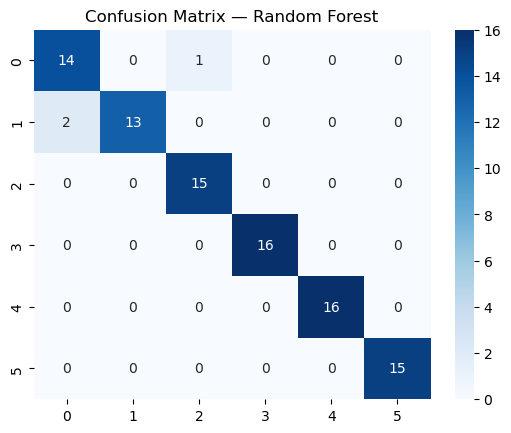

In [82]:
print("Random Forest Model Evaluation:")
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.show()


In [83]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# Bagging implementation
bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(),
    n_estimators=10,
    random_state=42
)

bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, bag_pred))

Bagging Accuracy: 0.9565217391304348


In [84]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_pred))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))

AdaBoost Accuracy: 0.5978260869565217
Gradient Boosting Accuracy: 0.9782608695652174


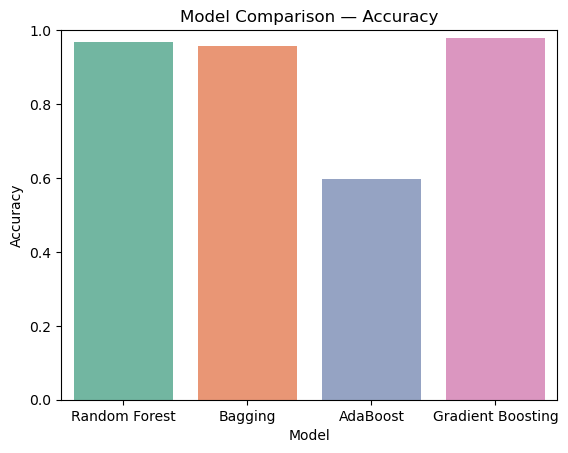

,Model,Accuracy
0,Random Forest,0.967391
1,Bagging,0.956522
2,AdaBoost,0.597826
3,Gradient Boosting,0.978261


In [85]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Bagging", "AdaBoost", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, bag_pred),
        accuracy_score(y_test, ada_pred),
        accuracy_score(y_test, gb_pred)
    ]
})

sns.barplot(x="Model", y="Accuracy", data=results, palette="Set2")
plt.title("Model Comparison — Accuracy")
plt.ylim(0, 1)
plt.show()

results

## Theoretical Explanation

### Bagging (Bootstrap Aggregating)

Generates several random subsets of the training data (using sampling with replacement).

Builds independent models on each of these subsets.

The final outcome is determined by a majority vote (for classification) or an average (for regression).

Goal: Decrease variance and minimize overfitting.


### Boosting

Builds models sequentially, where each new model attempts to fix the errors made by the previous ones.

Gives higher importance (weight) to data points that were misclassified.

Goal: Reduce bias and increase accuracy (though it may overfit if not properly tuned).

### Handling Imbalanced Data

### Methods include:

Oversampling (e.g., SMOTE, Random Oversampling): Increase the number of samples from the minority class by duplicating or generating synthetic examples.

Undersampling: Reduce the number of samples from the majority class to balance the dataset.

Class Weight Adjustment: Assign greater importance (weights) to the minority class during model training.

In [86]:
# Example of class weighting in RandomForest
rf_bal = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_bal.fit(X_train, y_train)
print("Weighted Random Forest Accuracy:", accuracy_score(y_test, rf_bal.predict(X_test)))

Weighted Random Forest Accuracy: 0.967391304347826


## Conclusion
Random Forest performs effectively because of its ensemble nature, which lowers variance and minimizes overfitting.
Managing imbalanced datasets is essential for accurate model evaluation.
Boosting algorithms such as Gradient Boosting can enhance accuracy, although they might overfit on smaller datasets.
Hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) helps optimize model performance.